# Review HMA PlanetScope query results
David Shean  
9/11/19

Using output from Shashank Bhushan's parallel query with the following base parameters:
* cloud_cover <= 0
* quality_category == "standard"
* instrument == "PS2"

In [1]:
%matplotlib inline

In [2]:
import pickle
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
fn = '/nobackup/deshean/hma/planet/HMA_planet_query_cc0_contains.pkl'

## Load pickled geodataframe

In [4]:
gdf = pickle.load(open(fn, 'rb'))

In [5]:
gdf.head()

,acquired,anomalous_pixels,clear_confidence_percent,clear_percent,cloud_cover,cloud_percent,columns,epsg_code,geometry,ground_control,...,shadow_percent,snow_ice_percent,strip_id,sun_azimuth,sun_elevation,updated,usable_data,view_angle,visible_confidence_percent,visible_percent
8,2015-12-21T04:17:52,0.0,NaN,NaN,0.0,NaN,6553,32647,"POLYGON ((101.6377270072244 29.58691196244156,...",True,...,NaN,NaN,115866,164.5,35.5,2017-05-09T20:13:55,0.0,6.5,NaN,NaN
11,2015-12-21T04:17:50,0.0,NaN,NaN,0.0,NaN,6497,32647,"POLYGON ((101.5224476329291 29.48829215077364,...",True,...,NaN,NaN,115866,164.3,35.5,2017-05-09T20:13:40,0.0,6.4,NaN,NaN
19,2015-12-21T04:17:38,0.0,NaN,NaN,0.0,NaN,6553,32647,"POLYGON ((100.9008045438315 28.91447899681586,...",True,...,NaN,NaN,115866,163.5,35.9,2017-05-09T20:13:30,0.0,6.2,NaN,NaN
31,2016-01-08T05:33:00,0.0,NaN,NaN,0.0,NaN,5507,32647,"POLYGON ((101.7190374164377 30.1574204853732, ...",True,...,NaN,NaN,125741,182.2,37.8,2018-07-10T21:28:16,0.0,19.7,NaN,NaN
33,2016-03-15T02:28:16,0.0,NaN,NaN,0.0,NaN,5744,32648,"POLYGON ((102.0822039731986 28.83121324164402,...",True,...,NaN,NaN,159213,119.5,38.8,2017-10-03T02:46:23,0.0,3.2,NaN,NaN


## Clean up

In [6]:
gdf.shape

(2344067, 35)

In [7]:
gdf.drop_duplicates(subset='id', inplace=True)
gdf.shape

(2021839, 35)

In [8]:
gdf.set_index('id', inplace=True)

In [9]:
gdf['acquired'] = pd.to_datetime(gdf['acquired'])

In [10]:
gdf['acquired'].min()

Timestamp('2015-11-04 08:52:30')

In [11]:
gdf['acquired'].max()

Timestamp('2019-09-03 06:00:05')

## Add column with decimal year for convenience
Should add timelib function to do this with input pd DataSeries

In [12]:
from pygeotools.lib import timelib
gdf['acquired_decyear'] = timelib.np_dt2decyear(gdf['acquired'].dt.to_pydatetime())

In [13]:
gdf.iloc[0]

acquired                                                    2015-12-21 04:17:52
anomalous_pixels                                                              0
clear_confidence_percent                                                    NaN
clear_percent                                                               NaN
cloud_cover                                                                   0
cloud_percent                                                               NaN
columns                                                                    6553
epsg_code                                                                 32647
geometry                      POLYGON ((101.6377270072244 29.58691196244156,...
ground_control                                                             True
gsd                                                                         3.1
heavy_haze_percent                                                          NaN
index_right                             

In [14]:
gdf.shape

(2021839, 35)

In [15]:
gdf.describe()

,anomalous_pixels,clear_confidence_percent,clear_percent,cloud_cover,cloud_percent,columns,epsg_code,gsd,heavy_haze_percent,index_right,...,rows,shadow_percent,snow_ice_percent,sun_azimuth,sun_elevation,usable_data,view_angle,visible_confidence_percent,visible_percent,acquired_decyear
count,2.021839e+06,262422.000000,286823.000000,2021839.0,286823.000000,2.021839e+06,2.021839e+06,2.021839e+06,262422.000000,2021839.0,...,2.021839e+06,262422.000000,262422.000000,2.021839e+06,2.021839e+06,1887057.0,2.021839e+06,262422.000000,262422.000000,2.021839e+06
mean,8.291664e-03,93.479838,89.551169,0.0,1.079404,8.349719e+03,3.264430e+04,3.697528e+00,0.262672,0.0,...,4.633760e+03,0.275693,1.887433,1.392733e+02,4.522647e+01,0.0,1.676164e+00,81.646234,98.665253,2.018141e+03
std,2.692638e-02,7.992060,24.826175,0.0,4.816665,1.098968e+03,1.448269e+00,3.323610e-01,2.408188,0.0,...,6.518064e+02,0.910698,6.701880,2.873429e+01,1.264629e+01,0.0,1.763169e+00,13.443127,5.247460,7.833308e-01
min,0.000000e+00,30.000000,0.000000,0.0,0.000000,2.742000e+03,3.264200e+04,2.000000e+00,0.000000,0.0,...,5.720000e+02,0.000000,0.000000,6.830000e+01,1.000000e+01,0.0,0.000000e+00,35.000000,0.000000,2.015842e+03
25%,0.000000e+00,92.000000,95.000000,0.0,0.000000,8.245000e+03,3.264300e+04,3.600000e+00,0.000000,0.0,...,4.295000e+03,0.000000,0.000000,1.214000e+02,3.560000e+01,0.0,2.000000e-01,73.000000,100.000000,2.017672e+03
50%,0.000000e+00,96.000000,100.000000,0.0,0.000000,8.855000e+03,3.264400e+04,3.900000e+00,0.000000,0.0,...,4.484000e+03,0.000000,0.000000,1.386000e+02,4.600000e+01,0.0,1.000000e+00,80.000000,100.000000,2.017946e+03
75%,1.000000e-02,98.000000,100.000000,0.0,0.000000,8.980000e+03,3.264500e+04,3.900000e+00,0.000000,0.0,...,4.692000e+03,0.000000,0.000000,1.503000e+02,5.610000e+01,0.0,2.800000e+00,97.000000,100.000000,2.018699e+03
max,4.400000e-01,100.000000,100.000000,0.0,100.000000,1.068400e+04,3.264800e+04,4.900000e+00,100.000000,0.0,...,7.865000e+03,20.000000,100.000000,2.915000e+02,8.410000e+01,0.0,2.000000e+01,100.000000,100.000000,2.019672e+03


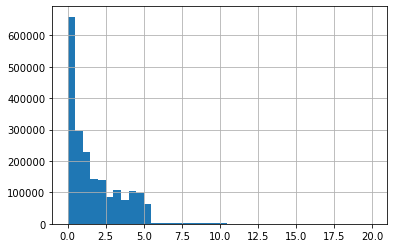

In [16]:
gdf['view_angle'].hist(bins=40)

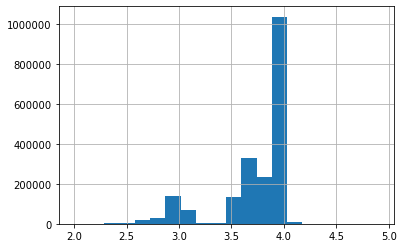

In [17]:
gdf['gsd'].hist(bins=20)

## Compute total area

In [26]:
#These are approximate PS image dimensions
area_est = (gdf.shape[0] * 24.6 * 16.4)
print('%0.0f km2' % area_est)

815690726 km2


In [18]:
aea_crs = {u'datum':u'WGS84',u'lat_0':36,u'lat_1':25,u'lat_2':47,u'lon_0':85,u'no_defs':True,u'proj':u'aea',u'units':u'm',u'x_0':0,u'y_0':0}

In [19]:
gdf_aea = gdf.to_crs(aea_crs)

In [20]:
gdf_aea_area = gdf_aea.area.sum()/1E6
print('%0.0f km^2' % gdf_aea_area)

388489557 km2


## Extract limited gdf, use centroid point instead of polygon

In [18]:
df_lim = gdf[['acquired','acquired_decyear','gsd']]

In [19]:
df_lim.head()

,acquired,acquired_decyear,gsd
id,,,
20151221_041752_1_0c73,2015-12-21 04:17:52,2015.970354,3.1
20151221_041750_0c73,2015-12-21 04:17:50,2015.970354,3.1
20151221_041738_1_0c73,2015-12-21 04:17:38,2015.970353,3.1
20160108_053300_1_0c73,2016-01-08 05:33:00,2016.019758,3.3
20160315_022816_0c73,2016-03-15 02:28:16,2016.202353,2.8


In [20]:
c = gdf.centroid

In [21]:
gdf_lim = gpd.GeoDataFrame(df_lim, geometry=c)

In [22]:
gdf_lim.head()

,acquired,acquired_decyear,gsd,geometry
id,,,,
20151221_041752_1_0c73,2015-12-21 04:17:52,2015.970354,3.1,POINT (101.6931760657216 29.51652419390798)
20151221_041750_0c73,2015-12-21 04:17:50,2015.970354,3.1,POINT (101.5785382875769 29.41680770041781)
20151221_041738_1_0c73,2015-12-21 04:17:38,2015.970353,3.1,POINT (100.9579345455757 28.84242232821079)
20160108_053300_1_0c73,2016-01-08 05:33:00,2016.019758,3.3,POINT (101.6336091935001 30.10317863705169)
20160315_022816_0c73,2016-03-15 02:28:16,2016.202353,2.8,POINT (102.1687959979767 28.87091981816042)


## Limit to small number of samples for testing

In [67]:
n = 100000
gdf_s = gdf.sample(n)
gdf_lim_s = gdf_lim.sample(n)

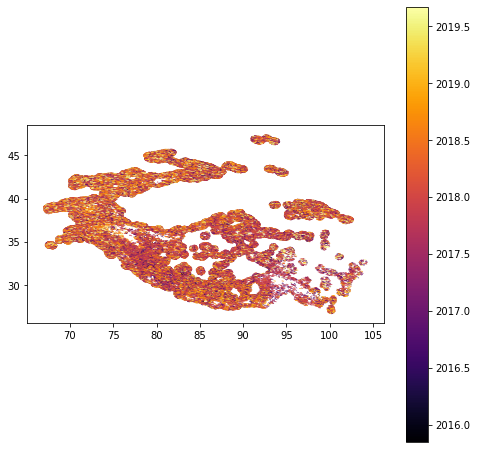

In [68]:
gdf_s.plot('acquired_decyear', cmap='inferno', legend=True, figsize=(8,8))

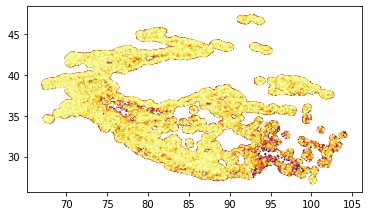

In [69]:
gdf_lim_s.plot(c=gdf_lim_s['acquired_decyear'], markersize=1, cmap='inferno', legend=True)

In [70]:
gdf_bounds = gdf_lim_s.total_bounds
gdf_center = (np.mean([gdf_bounds[0], gdf_bounds[2]]), np.mean([gdf_bounds[1], gdf_bounds[3]]))
gdf_center

(85.6619676534169, 37.04353673346657)

## Hexbin heatmap

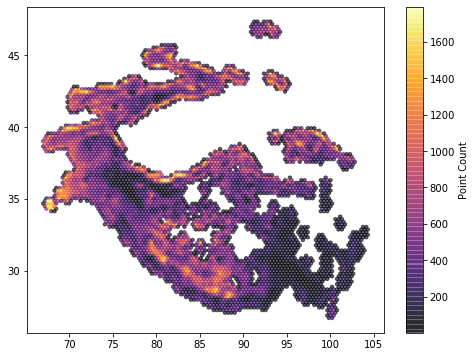

In [27]:
f,ax = plt.subplots(figsize=(8,6))
hb = ax.hexbin(gdf_lim.geometry.x, gdf_lim.geometry.y, gridsize=100, cmap='inferno', alpha=0.6, mincnt=1)
plt.colorbar(hb, label='Point Count')

Are there edge artifacts around your buffered polygon? Or are those clear images around the mountains?

## Generate interactive heatmap - needs tweaking
https://python-visualization.github.io/folium/plugins.html

In [28]:
import folium
from folium.plugins import HeatMap

hmap = folium.Map(location=[gdf_center[1], gdf_center[0]], zoom_start=5, )

hm_wide = HeatMap( list(zip(gdf_lim_s.geometry.y.values, gdf_lim_s.geometry.x.values)),
                   #min_opacity=0.2,
                   #radius=17, blur=15, 
                   #max_zoom=1, 
                 )

hmap.add_child(hm_wide)

## Plot annual coverage, splitting for start of monsoon

In [71]:
#Assume July 1 start
bins=[2015.5, 2016.5, 2017.5, 2018.5, 2019.5, 2020.5]
df_cut = pd.cut(gdf_lim_s['acquired_decyear'], bins)

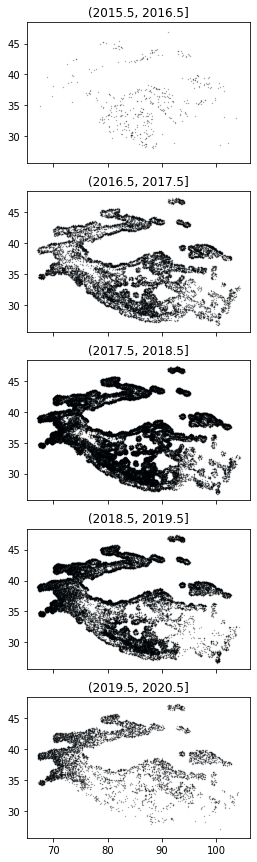

In [72]:
f,axa = plt.subplots(5,1, figsize=(4,15), sharex=True, sharey=True)
axa = axa.ravel()
for n,i in enumerate(gdf_lim_s.groupby(df_cut)):
    axa[n].scatter(i[1].geometry.x, i[1].geometry.y, s=0.1, label=i[0], edgecolor='k', alpha=0.5)
    axa[n].set_title(i[0])

## Plot each month, using records from all years

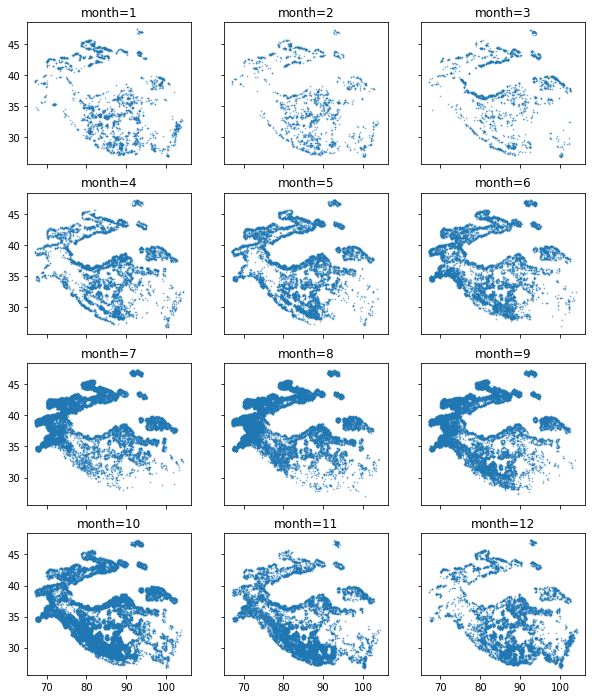

In [73]:
f,axa = plt.subplots(4,3, figsize=(10,12), sharex=True, sharey=True)
axa = axa.ravel()
for i in np.arange(1,13):
    idx = gdf_lim_s['acquired'].dt.month == i
    axa[i-1].scatter(gdf_lim_s[idx].geometry.x, gdf_lim_s[idx].geometry.y, s=0.5, alpha=0.5)
    axa[i-1].set_title('month=%i' % i)

## Point query

In [31]:
from shapely.geometry import Point
p = Point(*gdf_center)
#Khumbu
p = Point(86.8308, 27.9720)

In [32]:
point_query = gdf[gdf.contains(p)]

In [33]:
point_query

,acquired,anomalous_pixels,clear_confidence_percent,clear_percent,cloud_cover,cloud_percent,columns,epsg_code,geometry,ground_control,...,snow_ice_percent,strip_id,sun_azimuth,sun_elevation,updated,usable_data,view_angle,visible_confidence_percent,visible_percent,acquired_decyear
id,,,,,,,,,,,,,,,,,,,,,
20161109_044011_0d06,2016-11-09 04:40:11,0.00,NaN,NaN,0.0,NaN,6196,32645,"POLYGON ((86.68145549156351 27.89389451525638,...",True,...,NaN,288733,155.3,41.5,2017-11-14T17:12:28,0.0,1.0,NaN,NaN,2016.855723
20161220_033043_0c82,2016-12-20 03:30:43,0.00,NaN,NaN,0.0,NaN,6249,32645,"POLYGON ((86.79416159817212 28.01868988534286,...",True,...,NaN,338418,139.3,25.8,2017-11-14T21:59:16,0.0,2.3,NaN,NaN,2016.967613
20181022_042335_0f35,2018-10-22 04:23:35,0.00,NaN,NaN,0.0,NaN,8852,32645,"POLYGON ((86.85381052681196 27.89890719880682,...",True,...,NaN,1782905,146.4,44.9,2018-10-23T04:21:13,0.0,0.1,NaN,NaN,2018.805867
20181126_041206_1050,2018-11-26 04:12:06,0.09,NaN,NaN,0.0,NaN,8277,32645,"POLYGON ((86.61884063259262 27.9763970041084, ...",True,...,NaN,1879154,149.0,34.6,2018-11-27T04:31:22,0.0,0.0,NaN,NaN,2018.901850


In [34]:
min_decyear = gdf['acquired_decyear'].min()
max_decyear = gdf['acquired_decyear'].max()

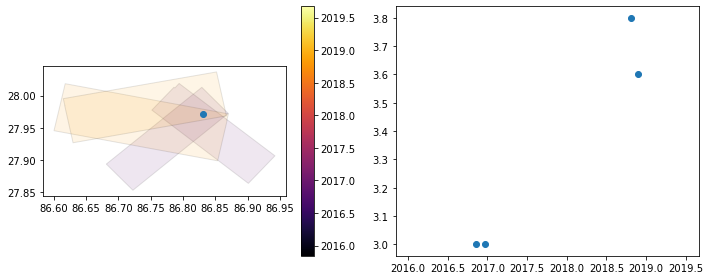

In [35]:
f,axa = plt.subplots(1,2, figsize=(10,4))
point_query.plot('acquired_decyear', ax=axa[0], cmap='inferno', vmin=min_decyear, vmax=max_decyear, alpha=0.1, edgecolor='k', legend=True)
axa[0].plot(p.x, p.y, marker='o')
axa[1].plot(point_query['acquired_decyear'], point_query['gsd'], marker='o', lw=0)
axa[1].set_xlim(min_decyear, max_decyear)
plt.tight_layout()

## Glacier polygon query
Identify polygons with highest count